In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import Image
import numpy as np
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /content/gdrive

MyDrive


In [17]:
# Augmentation and splitting 20% dataset for validation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    height_shift_range=0.2,
    shear_range=0.2,
    validation_split=0.2
)

#Training_generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/DATASET',  
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        shuffle = True,
        class_mode='categorical')

#Validation_generator
validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/DATASET',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 600 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [18]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Hp_Screen_Broken' 'Laptop_Bluescreen']


In [5]:
#Model
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  
  return model

In [6]:
model=create_model()
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,
          epochs=6,
          validation_data=validation_generator)

Epoch 1/6
19/19 [==============================] - 127s 7s/step - loss: 0.7720 - accuracy: 0.7517 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 2/6
19/19 [==============================] - 41s 2s/step - loss: 0.1487 - accuracy: 0.9667 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 3/6
19/19 [==============================] - 42s 2s/step - loss: 0.1132 - accuracy: 0.9733 - val_loss: 0.0764 - val_accuracy: 0.9833
Epoch 4/6
19/19 [==============================] - 41s 2s/step - loss: 0.0879 - accuracy: 0.9717 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 5/6
19/19 [==============================] - 42s 2s/step - loss: 0.0744 - accuracy: 0.9717 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 6/6
19/19 [==============================] - 40s 2s/step - loss: 0.0706 - accuracy: 0.9800 - val_loss: 0.0509 - val_accuracy: 0.9833


In [ ]:
model.evaluate(validation_generator)

4/4 [==============================] - 5s 1s/step - loss: 0.0405 - accuracy: 0.9917


[0.040459077805280685, 0.9916666746139526]

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Text(0.5, 1.0, 'Training and validation loss')

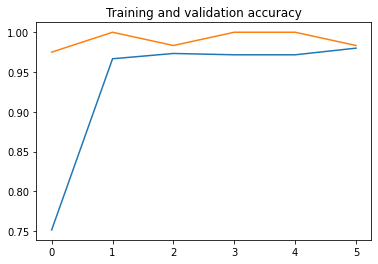

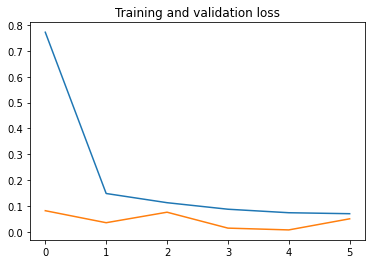

In [7]:
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Testing The Model

In [11]:
#Defining the val_image_batch and val_label_batch
val_image_batch, val_label_batch = next(iter(validation_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 150, 150, 3)


Prediction results shape: (32, 2)


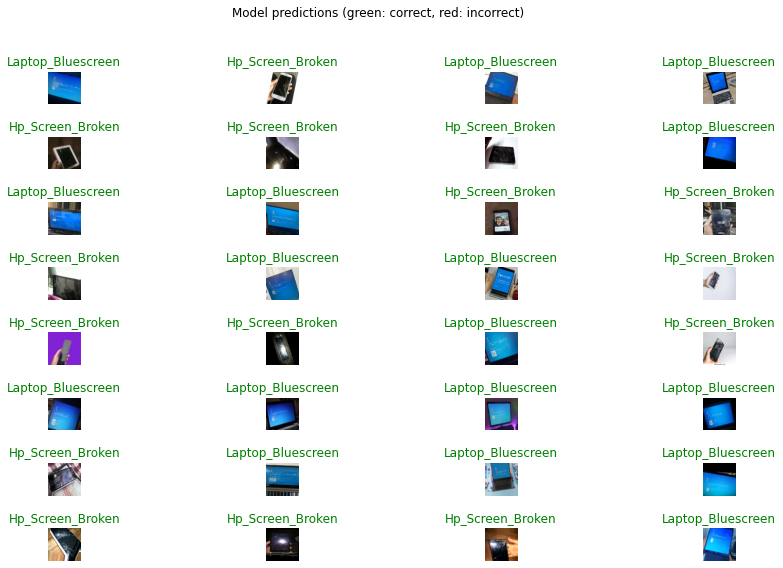

In [30]:
#Prediction
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=1)
for n in range(32):
  plt.subplot(8,4,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")